In [1]:
! pip install pymongo
! pip install -U plotly

In [2]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [3]:
# Datos de conexión
usuario = "madris1402"
password = "maranes8"
cluster = "clusterrmu.s1ici9p.mongodb.net"
base_datos = "analytics"
coleccion = "sales_cubo"

# Cadena de conexión
uri = f"mongodb+srv://{usuario}:{password}@{cluster}/?retryWrites=true&w=majority"
# Crear cliente
client = MongoClient(uri)

#Madrigal Urencio Ricardo
client

MongoClient(host=['ac-tljpgji-shard-00-01.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-00.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-02.s1ici9p.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-10ra0l-shard-0', tls=True)

In [4]:
#Conexion a la DB
db = client[base_datos]
coll = db[coleccion]

print(db)
print(coll)

Database(MongoClient(host=['ac-tljpgji-shard-00-01.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-00.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-02.s1ici9p.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-10ra0l-shard-0', tls=True), 'analytics')
Collection(Database(MongoClient(host=['ac-tljpgji-shard-00-01.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-00.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-02.s1ici9p.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-10ra0l-shard-0', tls=True), 'analytics'), 'sales_cubo')


In [7]:
#Slice
## Promedio de Edad de Clientes por Pais y Genero en un Continente
pipeline = [
    { "$match": { "continent": { "$regex": "AMERICA", "$options": "i" } } },
    { "$group": {
        "_id": { "country": "$country_name", "gender": "$gender" },
        "avg_age": { "$avg": "$age" }
    }},
    { "$project": {
        "country_name": "$_id.country",
        "gender": "$_id.gender",
        "avg_age": { "$round": ["$avg_age", 2] },
        "_id": 0
    }},
    { "$sort": { "country_name": 1, "gender": 1 } }
]

result = list(coll.aggregate(pipeline))
df = pd.DataFrame(result)
df

,country_name,gender,avg_age
0,Argentina,Female,48.31
1,Argentina,Male,54.25
2,Argentina,Non-Binary,56.42
3,Brazil,Female,45.44
4,Brazil,Male,54.00
5,Brazil,Non-Binary,53.52
6,Canada,Female,49.70
7,Canada,Male,57.00
8,Canada,Non-Binary,42.56
9,Colombia,Female,49.00


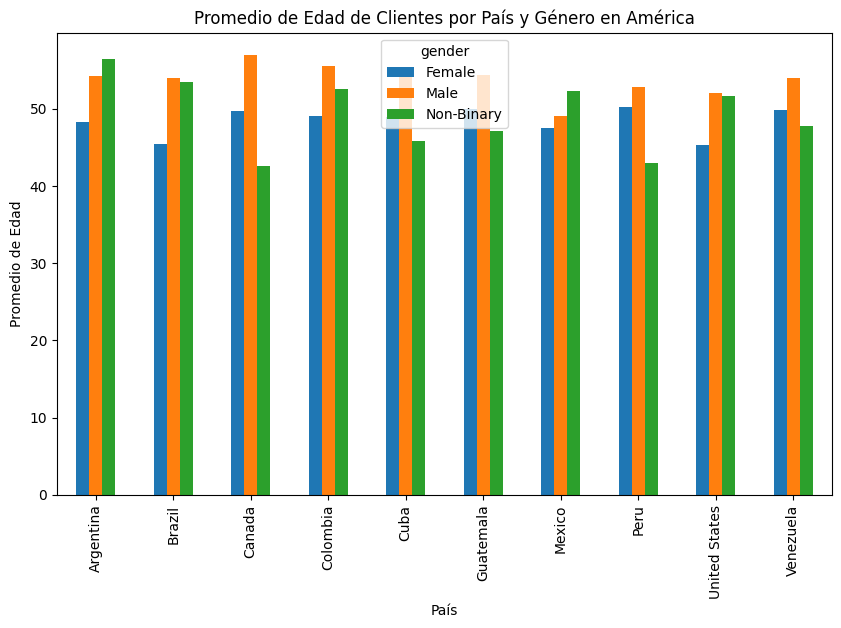

In [10]:
df.pivot(index='country_name', columns='gender', values='avg_age').plot(kind='bar', figsize=(10, 6),
  title='Promedio de Edad de Clientes por País y Género en América')

plt.xlabel('País')
plt.ylabel('Promedio de Edad')
plt.show()

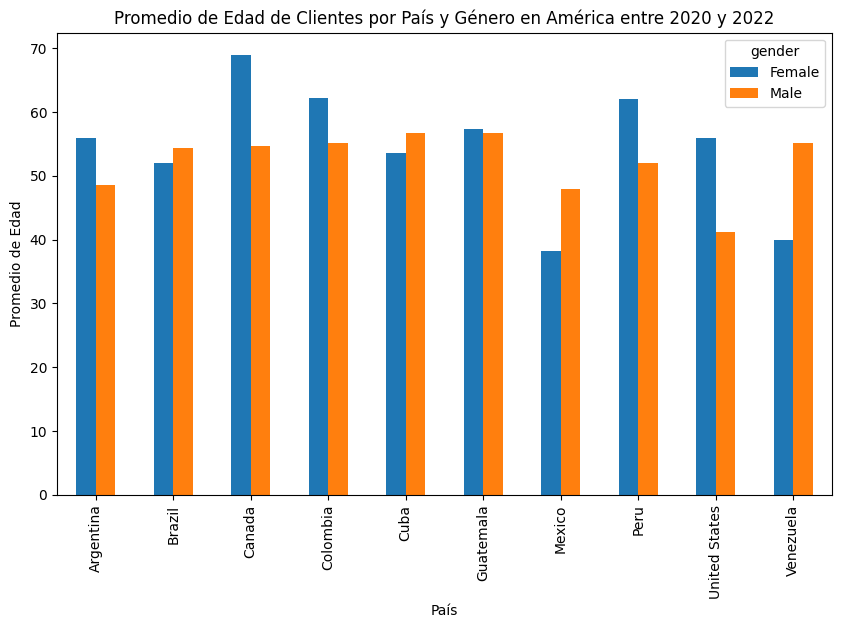

In [29]:
#Dice
## Promedio de Edad de Clientes por Pais y un Genero en un Continente y rango de años
pipeline = [
    { "$match": {
        "continent": { "$regex": "AMERICA", "$options": "i" },
        "gender": {"$ne": "Non-Binary"},
        "year": { "$gte": 2020, "$lte": 2022 }
        }
    },
    { "$group": {
        "_id": { "country": "$country_name", "gender": "$gender" },
        "avg_age": { "$avg": "$age" }
    }},
    { "$project": {
        "country_name": "$_id.country",
        "gender": "$_id.gender",
        "avg_age": { "$round": ["$avg_age", 2] },
        "_id": 0
    }},
    { "$sort": { "country_name": 1, "gender": 1 } }
]

result = list(coll.aggregate(pipeline))
df = pd.DataFrame(result)

df.pivot(index='country_name', columns='gender', values='avg_age').plot(kind='bar', figsize=(10, 6),
  title='Promedio de Edad de Clientes por País y Género en América entre 2020 y 2022')

plt.xlabel('País')
plt.ylabel('Promedio de Edad')
plt.show()

In [30]:
#Ganancia total por continente
pipeline = [
    { "$group": {
        "_id": "$continent",
        "total_profit": { "$sum": "$profit" }
    }},
    { "$project": {
        "continent": "$_id",
        "total_profit": "$total_profit",
        "_id": 0
    }}
]

result = list(coll.aggregate(pipeline))
df = pd.DataFrame(result)
df

,continent,total_profit
0,South America,43938.718045
1,Oceania,35963.841670
2,North America,23425.560063
3,Africa,26534.429254
4,Europe,57664.913411
5,Asia,36550.149393


In [31]:
#Graficos Interactivos
fig = px.pie(df,
             values='total_profit',
             names='continent',
             title='Ganancia Total por Continente',
             hole = 0)
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [32]:
#Graficos Interactivos
fig = px.pie(df,
             values='total_profit',
             names='continent',
             title='Ganancia Total por Continente',
             hole = 0.5)
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

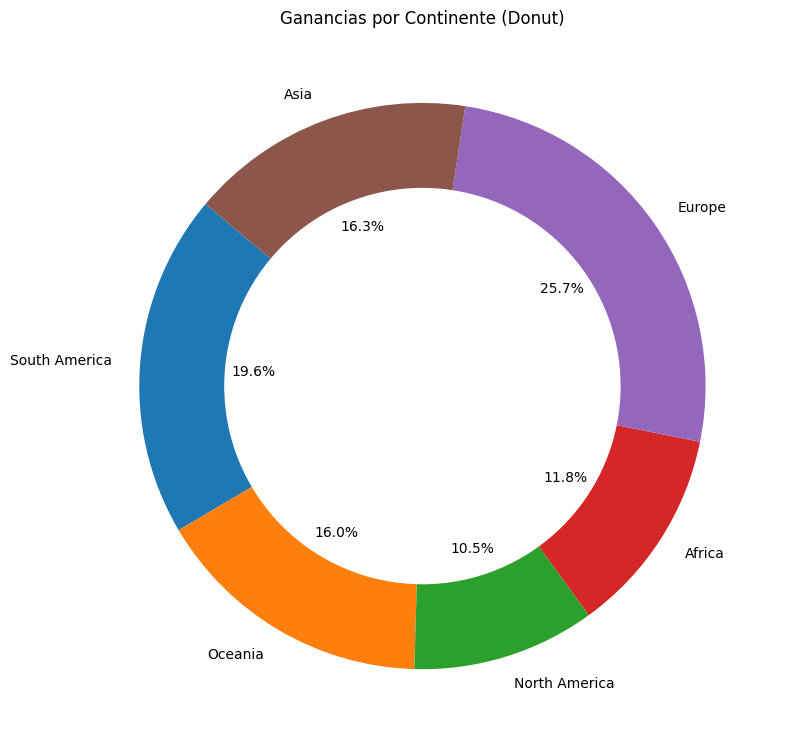

In [33]:
#4.2. Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(df['total_profit'],
                                  labels=df['continent'],
                                  autopct='%1.1f%%',
                                  startangle=140)
# Círculo central para simular el donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Ganancias por Continente (Donut)')
plt.tight_layout()
plt.show()

In [34]:
#Graficos Interactivos
fig = px.treemap(df,
             values='total_profit',
             path=['continent'],
             title='Ganancia Total por Continente, TreeMap')
fig.update_traces(textinfo='label+value+percent entry')
fig.show()

In [37]:
#Grafico de Radar
labels = df['continent']
values = df['total_profit']
fig = px.line_polar(r=values, theta=labels, line_close=True,
                    title='Ganancia Total por Continente, Radar')
fig.update_traces(fill='toself')
fig.show()

In [54]:
#Drilldown
pipeline = [
    { "$group": {
        "_id": { "continent": "$continent", "country": "$country_name" },
        "total_profit": { "$sum": "$profit" }
    }},
    { "$project": {
        "continent": "$_id.continent",
        "country_name": "$_id.country",
        "total_profit": 1,
        "_id": 0
    }},
    { "$sort": { "continent": 1, "country_name": 1 } }
]

result = list(coll.aggregate(pipeline))
df = pd.DataFrame(result)
df_sorted = df.sort_values(by=['continent', 'total_profit'], ascending=[True, False])
df_sorted

,total_profit,continent,country_name
3,17086.399225,Africa,Nigeria
0,9258.992880,Africa,Egypt
2,6763.855524,Africa,Morocco
4,-3068.347620,Africa,South Africa
1,-3506.470755,Africa,Kenya
8,15364.637656,Asia,Japan
5,10282.878260,Asia,China
9,4701.323443,Asia,South Korea
7,3483.627214,Asia,Indonesia
6,2717.682820,Asia,India


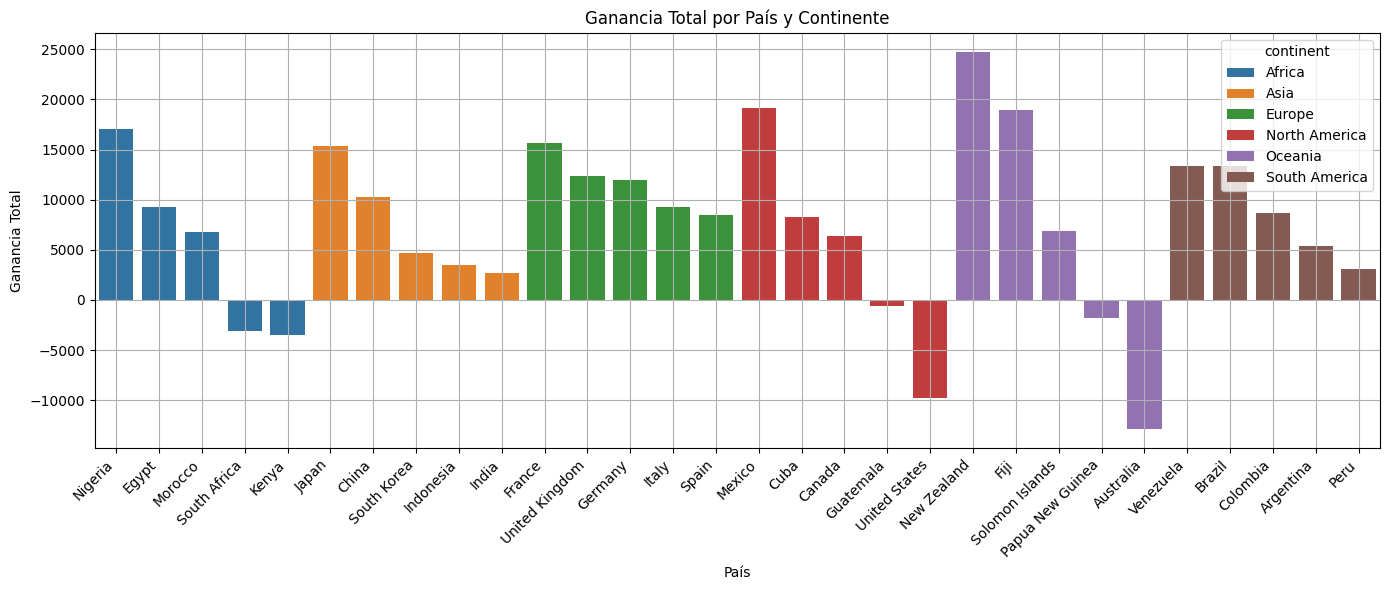

In [55]:
plt.figure(figsize=(14, 6))
sns.barplot(x='country_name', y='total_profit', hue='continent', data=df_sorted)
plt.xticks(rotation=45, ha="right")
plt.xlabel('País')
plt.ylabel('Ganancia Total')
plt.title('Ganancia Total por País y Continente')
plt.tight_layout()
plt.grid(True)
plt.show()

In [56]:
pipeline = [
    {
        "$group": {
            "_id": "$country_name",
            "total_profit": { "$sum": "$profit" }
        }
    },
    { "$sort": { "total_profit": -1 } },
    {
        "$project": {
            "country_name": "$_id",
            "total_profit": 1,
            "_id": 0
        }
    }
]

result = list(coll.aggregate(pipeline))
df = pd.DataFrame(result)
df

,total_profit,country_name
0,24759.029780,New Zealand
1,19146.358240,Mexico
2,18985.229340,Fiji
3,17086.399225,Nigeria
4,15641.041690,France
5,15364.637656,Japan
6,13379.511797,Venezuela
7,13321.024844,Brazil
8,12312.856212,United Kingdom
9,11917.713569,Germany


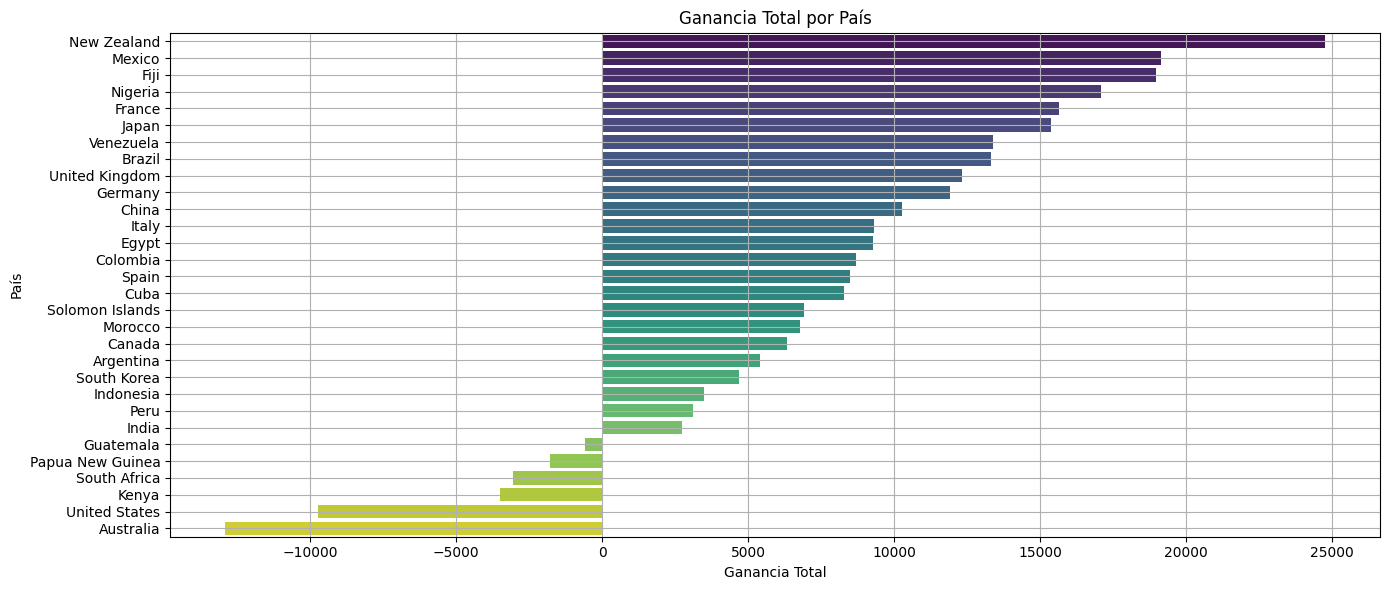

In [62]:
plt.figure(figsize=(14, 6))
sns.barplot(x='total_profit', y='country_name', data=df, palette='viridis', hue='country_name')
plt.xlabel('Ganancia Total')
plt.ylabel('País')
plt.title('Ganancia Total por País')
plt.tight_layout()
plt.grid(True)
plt.show()

In [63]:
pipeline = [
    {
        "$group": {
            "_id": {
                "customer": "$customer",
                "age": "$age",
                "gender": "$gender",
                "occupation": "$occupation"
            },
            "total_profit": { "$sum": "$profit" }
        }
    },
    { "$sort": { "total_profit": -1 } },
    {
        "$project": {
            "customer": "$_id.customer",
            "age": "$_id.age",
            "gender": "$_id.gender",
            "occupation": "$_id.occupation",
            "total_profit": 1,
            "_id": 0
        }
    }
]

result = list(coll.aggregate(pipeline))
df = pd.DataFrame(result)
df

,total_profit,customer,age,gender,occupation
0,13606.523980,Daniel Hicks,45,Male,Magazine journalist
1,12191.393397,Valerie Kennedy,69,Non-Binary,Historic buildings inspector/conservation officer
2,12083.332980,Ryan Meyer,58,Female,Solicitor
3,10354.241400,Brandon May,35,Male,Technical author
4,10112.540800,Brooke Leonard,78,Non-Binary,Farm manager
...,...,...,...,...,...
180,-8677.403800,Allison Maddox,77,Female,"Administrator, arts"
181,-12165.969860,Antonio Keller,53,Male,Volunteer coordinator
182,-12911.124355,Angela Williams,57,Female,Local government officer
183,-14798.718300,Misty Boone,65,Female,Chief Financial Officer


Text(0.5, 1.0, 'Ganancia Total por Cliente')

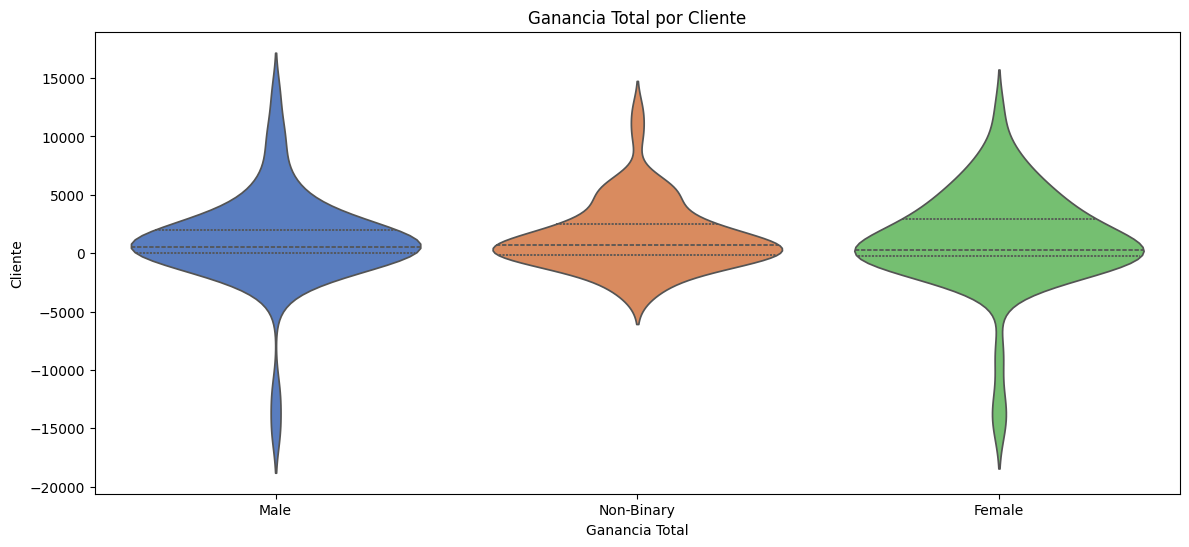

In [69]:
plt.figure(figsize=(14, 6))
sns.violinplot(y='total_profit', x='gender', data=df, palette='muted', hue="gender", inner="quartile")
plt.xlabel('Ganancia Total')
plt.ylabel('Cliente')
plt.title('Ganancia Total por Cliente')

In [72]:
#Paises mas rentables por continente
pipeline = [
    {
        "$group": {
            "_id": { "continent": "$continent", "country": "$country_name" },
            "total_profit": { "$sum": "$profit" }
        }
    },
    { "$sort": { "_id.continent": 1, "total_profit": -1 } },
    {
        "$group": {
            "_id": "$_id.continent",
            "countries": {
                "$push": {
                    "country": "$_id.country",
                    "total_profit": "$total_profit"
                }
            }
        }
    },
    {
        "$project": {
            "continent": "$_id",
            "top3": { "$slice": ["$countries", 3] },
            "_id": 0
        }
    }
]

result = list(coll.aggregate(pipeline))
df = pd.DataFrame(result)
df

,continent,top3
0,Africa,"[{'country': 'Nigeria', 'total_profit': 17086...."
1,Europe,"[{'country': 'France', 'total_profit': 15641.0..."
2,North America,"[{'country': 'Mexico', 'total_profit': 19146.3..."
3,South America,"[{'country': 'Venezuela', 'total_profit': 1337..."
4,Oceania,"[{'country': 'New Zealand', 'total_profit': 24..."
5,Asia,"[{'country': 'Japan', 'total_profit': 15364.63..."


In [74]:
expanded = []
for doc in result:
    for country in doc["top3"]:
        expanded.append({
            "continent": doc["continent"],
            "country": country["country"],
            "total_profit": country["total_profit"]
        })

df = pd.DataFrame(expanded)
df

,continent,country,total_profit
0,Africa,Nigeria,17086.399225
1,Africa,Egypt,9258.992880
2,Africa,Morocco,6763.855524
3,Europe,France,15641.041690
4,Europe,United Kingdom,12312.856212
5,Europe,Germany,11917.713569
6,North America,Mexico,19146.358240
7,North America,Cuba,8272.317723
8,North America,Canada,6346.981249
9,South America,Venezuela,13379.511797


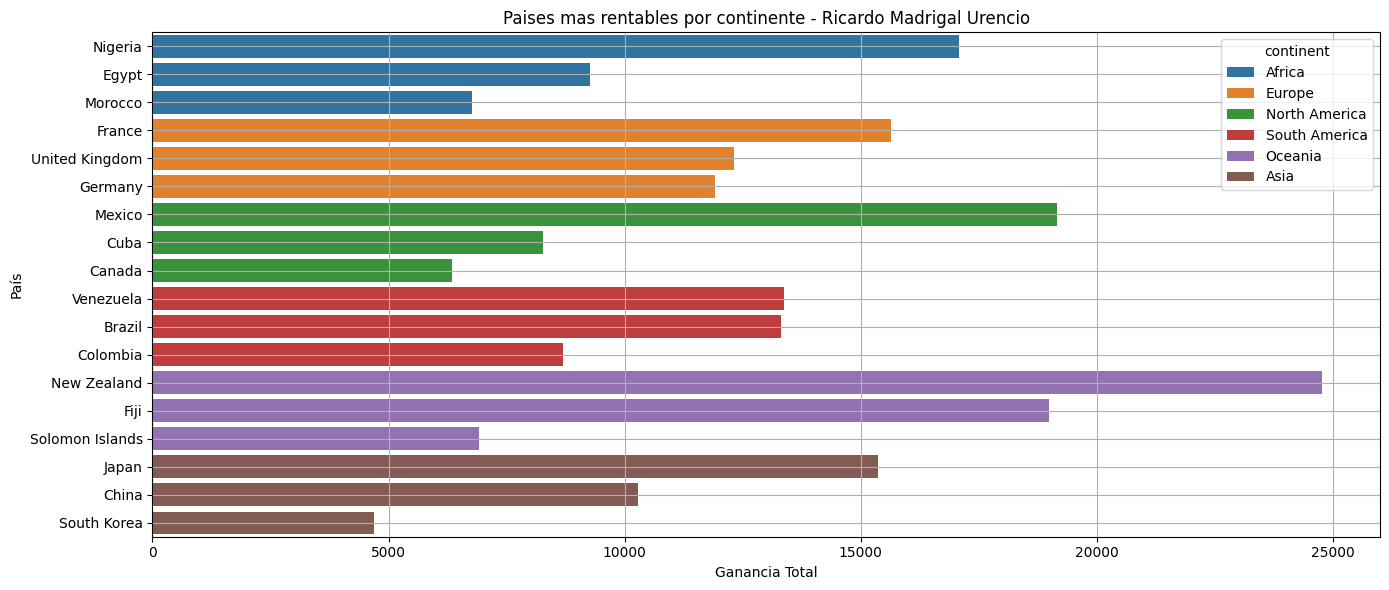

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [77]:
plt.figure(figsize=(14, 6))
sns.barplot(x='total_profit', y='country', hue='continent', data=df, palette='tab10')
plt.xlabel('Ganancia Total')
plt.ylabel('País')
plt.title('Paises mas rentables por continente - Ricardo Madrigal Urencio')
plt.tight_layout()
plt.grid(True)
plt.show()
plt